In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.layer import MatMul
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## \#1. 간단한 신경망 구조 만들어서 출력값 내보기

### 심플 맥락 데이터
- Sentence가 `you say goodbye and I say hello.` 일 때

In [2]:
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

### 가중치 초기화

In [3]:
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

### 계층 생성

In [4]:
# c0을 위한 layer
in_layer0 = MatMul(W_in)

In [5]:
# c1을 위한 layer
in_layer1 = MatMul(W_in)

In [6]:
# out layer
out_layer = MatMul(W_out)

### 순전파

In [7]:
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = (h0 + h1) / 2
s = out_layer.forward(h)

In [8]:
s

array([[ 2.16778813,  0.83379803, -0.60674946, -0.449572  , -0.36220193,
        -0.64026726,  0.27653848]])

## \#2. 신경망 진짜 학습시켜보기

### `corpus`, `id_to_word`, `word_to_id` 생성

In [9]:
from common.util import preprocess

In [10]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [11]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

### text안의 모든 target에 대한 맥락 쌍 생성

In [12]:
def create_contexts_target(corpus, window_size=1):
    # get all target in corpus
    target = corpus[window_size:-window_size]
    
    contexts = []
    for idx in range(window_size, len(corpus)-window_size):
        context = []
        for word_idx in range(-window_size, window_size+1):
            if word_idx == 0:
                continue
            context.append(corpus[idx+word_idx])
        contexts.append(context)
        
    return np.array(contexts), np.array(target)

In [13]:
contexts, target = create_contexts_target(corpus)

In [14]:
contexts

array([[0, 2],
       [1, 3],
       [2, 4],
       [3, 1],
       [4, 5],
       [1, 6]])

In [15]:
target

array([1, 2, 3, 4, 1, 5])

### one-hot 벡터로 변환하기

In [16]:
def convert_one_hot(vector, vocab_size):    
    N = vector.shape[0]
    
    if vector.ndim == 1:
        one_hot = np.zeros((N, vocab_size), dtype=np.int32)
        for idx, word_id in enumerate(vector):
            one_hot[idx, word_id] = 1
            
    elif vector.ndim == 2:
        C = vector.shape[1]
        one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)
        for idx_0, word_ids in enumerate(vector):
            for idx_1, word_id in enumerate(word_ids):
                one_hot[idx_0, idx_1, word_id] = 1
                
    return one_hot

In [17]:
vocab_size = len(word_to_id)

In [18]:
contexts_onehot = convert_one_hot(contexts, vocab_size)
print(contexts_onehot.shape)
contexts_onehot

(6, 2, 7)


array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]], dtype=int32)

In [19]:
target_onehot = convert_one_hot(target, vocab_size)
print(target_onehot.shape)
target_onehot

(6, 7)


array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

## \#3. 지금까지 한 것 import해서 써보기

In [20]:
from common.util import preprocess, create_contexts_target, convert_one_hot

In [21]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [22]:
target

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [23]:
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]], dtype=int32)

## \#4. CBOW 모델 구현

In [24]:
from common.layer import MatMul, SoftmaxWithLoss

In [25]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        # 가중치와 기울기 한 리스트에 모으기
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        # 단어의 분산벡터는 in 가중치로 이용
        self.word_vecs = W_in

        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) / 2
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer0.backward(da)
        self.in_layer1.backward(da)
        return None

## \#5. Trainer 클래스 수정

- 이번 코드에서는 하나의 가중치 (`W_in`)를 여러 계층(`in_layer0`, `in_layer1`)이 같이 공유하고 있다. 


- 따라서 `params에` 들어가는 가중치가 중복이 되게 되므로, `Trainer` class에서 `remove_duplicate` 부분을 추가한다.

```
# 공유되어서 중복된 가중치는 하나만 남겨두기
params, grads = remove_duplicate(model.params, model.grads)
```

> 이 부분 추가

## \#6. 학습 코드 구현

In [26]:
from common.util import preprocess, create_contexts_target, convert_one_hot
from common.net import SimpleCBOW
from common.trainer import Trainer
from common.optimizer import Adam

In [27]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

In [28]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [29]:
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [30]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

time 0s | epoch 100 | step 1 / 2 | loss 1.81
time 0s | epoch 100 | step 2 / 2 | loss 1.81
time 0s | epoch 200 | step 1 / 2 | loss 1.41
time 0s | epoch 200 | step 2 / 2 | loss 1.48
time 0s | epoch 300 | step 1 / 2 | loss 1.09
time 0s | epoch 300 | step 2 / 2 | loss 1.23
time 0s | epoch 400 | step 1 / 2 | loss 0.91
time 0s | epoch 400 | step 2 / 2 | loss 1.07
time 0s | epoch 500 | step 1 / 2 | loss 1.03
time 0s | epoch 500 | step 2 / 2 | loss 0.76
time 0s | epoch 600 | step 1 / 2 | loss 1.07
time 0s | epoch 600 | step 2 / 2 | loss 0.59
time 0s | epoch 700 | step 1 / 2 | loss 0.56
time 0s | epoch 700 | step 2 / 2 | loss 0.99
time 0s | epoch 800 | step 1 / 2 | loss 0.82
time 0s | epoch 800 | step 2 / 2 | loss 0.64
time 0s | epoch 900 | step 1 / 2 | loss 0.45
time 0s | epoch 900 | step 2 / 2 | loss 0.92
time 0s | epoch 1000 | step 1 / 2 | loss 0.76
time 0s | epoch 1000 | step 2 / 2 | loss 0.52


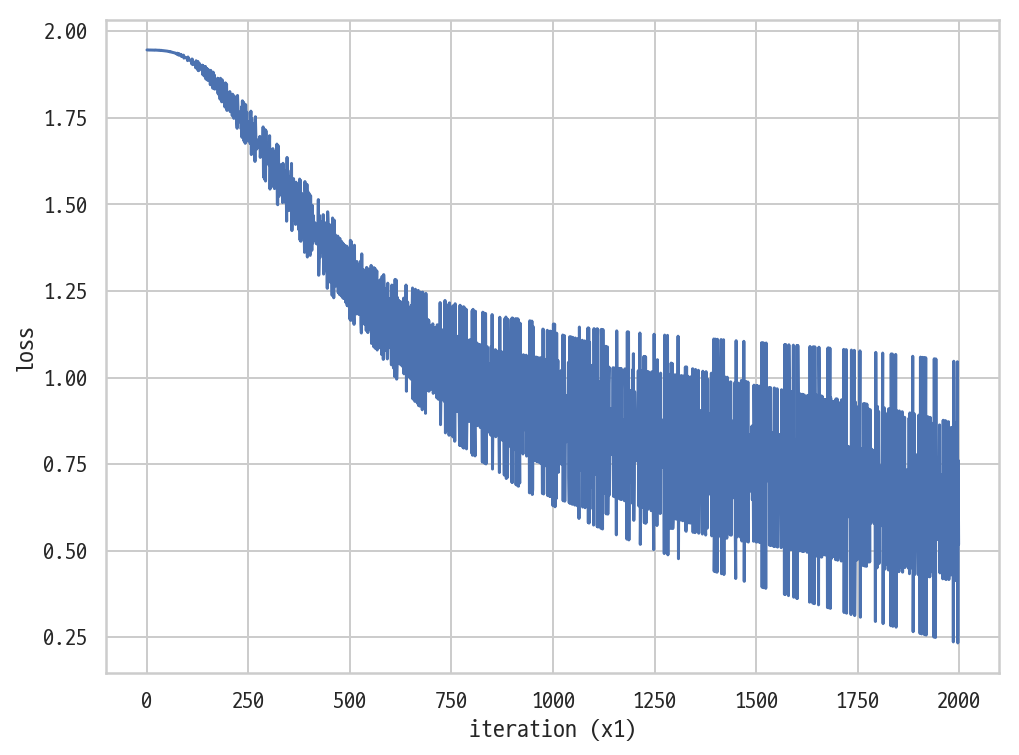

In [31]:
trainer.fit(contexts, target, max_epoch, batch_size, log_step=1, epoch_log_step=100)
trainer.plot()

## \#7. word vector 확인

In [37]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [-2.009795  -1.3443872  1.1206417  2.0201528 -1.2723113]
say [-0.5824253   1.3855861  -1.3562915   0.49263373  0.9158205 ]
goodbye [ 1.9269748 -0.5359201  1.0103825 -1.9436592 -0.6475052]
and [-1.2900462  0.7897226 -0.8321487  1.3284658  1.076623 ]
i [-1.368774  -1.2660834  1.2221243  1.3729293 -1.2154076]
hello [-0.00950809  0.00164262  0.00269014  0.01608871  0.00199415]
. [-0.0117107   0.01046016  0.00780615 -0.00337811  0.00038118]
